In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
# Combine the data into a single dataset
merge_data = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
merge_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

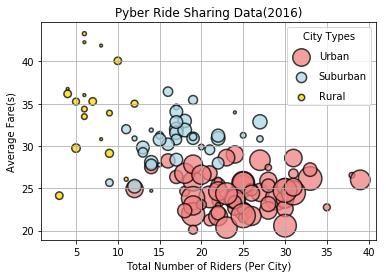

In [2]:
# Obtain the x and y coordinates for each of the three city types
grouped_city = merge_data.groupby(["city"])
fare_mean    = grouped_city['fare'].mean()
ride_count   = grouped_city['ride_id'].count()
driver_count = grouped_city['driver_count'].mean()
city_types   = grouped_city['type'].unique()

# Build the scatter plots for each city types
car_df       = pd.DataFrame({'fare_mean':fare_mean,'ride_count':ride_count,'driver_count':driver_count, 'city_types':city_types})
urban        = car_df.loc[car_df['city_types']=='Urban']
Suburban     = car_df.loc[car_df['city_types']=='Suburban']
Rural        = car_df.loc[car_df['city_types']=='Rural']

# Incorporate the other graph properties
plt.scatter(urban["ride_count"], urban["fare_mean"], c = "lightcoral", edgecolors="black", s = urban["driver_count"]*8, label = "Urban", alpha = 0.75, linewidth = 1.5)
plt.scatter(Suburban["ride_count"], Suburban["fare_mean"], c = "lightblue", edgecolors="black", s = Suburban["driver_count"]*8, label = "Suburban", alpha = 0.75, linewidth = 1.5)
plt.scatter(Rural["ride_count"], Rural["fare_mean"], c = "gold", edgecolors="black", s = Rural["driver_count"]*8, label = "Rural", alpha = 0.75, linewidth = 1.5)

# Create a legend
plt.legend(title="City Types",loc="best", labelspacing=1)
# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare(s)")
plt.grid()
# Save Figure
plt.savefig("../Images/Scatter plot of Ride Sharing Data")
plt.show()

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

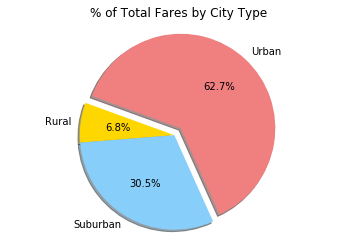

In [3]:
# Calculate Type Percents
grouped_data = merge_data.groupby(["type"])
grouped_data.head()

total_fare = merge_data["fare"].sum()
total_fare

total_fare_type = grouped_data["fare"].sum()
total_fare_type

percentage_fare_type = ((total_fare_type / total_fare)*100)
percentage_fare_type

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(percentage_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.axis("equal")
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/Pie-Total Fares by City Type")
plt.show

## Total Rides by City Type

<function matplotlib.pyplot.show(*args, **kw)>

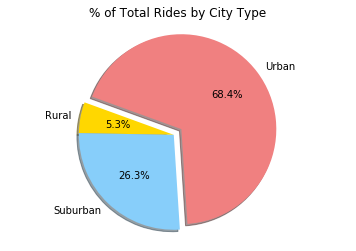

In [4]:
# Calculate Ride Percents
total_ride = merge_data["ride_id"].count()
total_ride

total_ride_type = grouped_data["ride_id"].count()
total_ride_type

percentage_ride_type = ((total_ride_type / total_ride)*100)
percentage_ride_type

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(percentage_ride_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("../Images/Pie-Total Rides by City Type")
plt.show

## Total Drivers by City Type

<function matplotlib.pyplot.show(*args, **kw)>

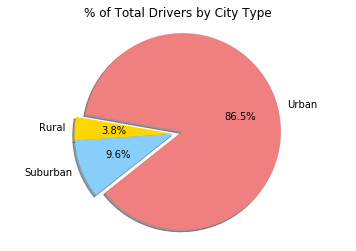

In [5]:
# Calculate Driver Percents
total_driver = len(merge_data["driver_count"].unique())
total_driver

remove_dup_data = merge_data.drop_duplicates(subset= 'driver_count', keep='first', inplace=False)
remove_dup_data

grouped_data_nodup = remove_dup_data.groupby(["type"])
grouped_data_nodup.head()

total_drivers_nodup = grouped_data_nodup["driver_count"].count()
total_drivers_nodup

percentage_driver_type = ((total_drivers_nodup / total_driver)*100)
percentage_driver_type

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

plt.pie(percentage_driver_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("../Images/Pie-Total Drivers by City Type")
plt.show